In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Null Hypothesis: Budget does not impact average rating

In [4]:
# Pull in Budgets DF
budgets_pd_orig = pd.read_csv('data/budgets_pd.csv')

In [5]:
# Pull in Rotten Tomato DF
rt_pd_orig = pd.read_csv('data/rt_pd.csv')

In [194]:
# DON'T TOUCH
rt_pd_orig_1300 = rt_pd_orig.copy()

rt_pd_1300 = rt_pd.copy()

In [196]:
# SAVE DON'T TOUCH TO CSV
rt_pd_orig_1300.to_csv(r'data/rt_pd_orig_1300.csv')
rt_pd_1300.to_csv(r'data/rt_pd_1300.csv')

In [173]:
budgets_pd_orig.tail()

,_id,date,title,budget,domestic_gross,worldwide_gross
6038,5f17b5918fbba2e9aaf4411d,Unknown,Red 11,"$7,000",$0,$0
6039,5f17b5918fbba2e9aaf4411e,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
6040,5f17b5918fbba2e9aaf4411f,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
6041,5f17b5918fbba2e9aaf44120,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
6042,5f17b5918fbba2e9aaf44121,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [49]:
# Clean budget, domestic, and worldwide series for new df
def form_budget_nums(series):
    '''
    Take in series from pd dataframe from budget and clear '$', ',' 
    and ascii characters that prevent from converting to int.
    Returns int64 series or list to be added to df
    '''
    temp = []
    for num in series:
        val = num.replace('$','').replace(',','').replace('\xa0','')
        temp.append(int(val))
#     return pd.Series(temp)
    return temp

# Clean and grab years used for link generation
def get_year(series):
    '''
    Take in date Series and clean to use for link generation on rt.
    Returns list of years in str form
    '''
    temp = []
    for date in series:
        try:
            val = date.replace(' ','').split(',')
            temp.append(val[1])
        except:
            temp.append(val[0])
    return temp
    
budgets = form_budget_nums(budgets_pd_orig['budget'])
domestics = form_budget_nums(budgets_pd_orig['domestic_gross'])
worldwides = form_budget_nums(budgets_pd_orig['worldwide_gross'])

years = get_year(budgets_pd_orig['date'])

In [54]:
budgets_pd = budgets_pd_orig[['title', 
                              'date']]
budgets_pd['budget'] = budgets
budgets_pd['domestic_gross'] = domestics
budgets_pd['worldwide_gross'] = worldwides


/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [58]:
budgets_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6043 entries, 0 to 6042
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            6043 non-null   object
 1   date             6043 non-null   object
 2   budget           6043 non-null   int64 
 3   domestic_gross   6043 non-null   int64 
 4   worldwide_gross  6043 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 236.2+ KB


In [61]:
rt_pd_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   _id                   1372 non-null   object
 1   title                 1372 non-null   object
 2   rotten_tomato_rating  1372 non-null   object
 3   audience_rating       1372 non-null   object
 4   director              1372 non-null   object
 5   writers               1372 non-null   object
 6   top_5_billed          1372 non-null   object
dtypes: object(7)
memory usage: 75.2+ KB


In [63]:
# Clean rt rating and audience rating series for new df
def form_rt_nums(series):
    '''
    Take in series from pd dataframe from budget and clear '%' 
    Returns int64 series or list to be added to df
    '''
    temp = []
    for num in series:
        val = num.replace('%','')
        temp.append(int(val))
    return temp
    
rt_ratings = form_rt_nums(rt_pd_orig['rotten_tomato_rating'])
aud_ratings = form_rt_nums(rt_pd_orig['audience_rating'])

In [67]:
rt_pd = rt_pd_orig[['title', 'director', 'writers', 'top_5_billed']]
rt_pd['rotten_tomato_rating'] = rt_ratings
rt_pd['audience_rating'] = aud_ratings

/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
rt_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 1372 non-null   object
 1   director              1372 non-null   object
 2   writers               1372 non-null   object
 3   top_5_billed          1372 non-null   object
 4   rotten_tomato_rating  1372 non-null   int64 
 5   audience_rating       1372 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 64.4+ KB


In [72]:
merged= pd.merge(rt_pd, budgets_pd, on='title')

In [147]:
merged_pd = merged[['title', 
                    'date', 
                    'rotten_tomato_rating', 
                    'audience_rating', 
                    'budget', 
                    'domestic_gross', 
                    'worldwide_gross', 
                    'director', 
                    'writers', 
                    'top_5_billed']]
# merged_pd.dropna('director')

In [75]:
merged.head(1)

,title,director,writers,top_5_billed,rotten_tomato_rating,audience_rating,date,budget,domestic_gross,worldwide_gross
0,Avengers: Endgame,['Anthony Russo'],"['Christopher Markus', ' Stephen McFeely']","['Robert Downey Jr. ', 'Mark Ruffalo ', 'Scarl...",94,90,"Apr 23, 2019",400000000,858373000,2797800564


In [76]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 1413 non-null   object
 1   director              1413 non-null   object
 2   writers               1413 non-null   object
 3   top_5_billed          1413 non-null   object
 4   rotten_tomato_rating  1413 non-null   int64 
 5   audience_rating       1413 non-null   int64 
 6   date                  1413 non-null   object
 7   budget                1413 non-null   int64 
 8   domestic_gross        1413 non-null   int64 
 9   worldwide_gross       1413 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 121.4+ KB


In [79]:
merged['title'].nunique()

1359

In [80]:
m = merged.drop_duplicates()

In [81]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 1390 non-null   object
 1   director              1390 non-null   object
 2   writers               1390 non-null   object
 3   top_5_billed          1390 non-null   object
 4   rotten_tomato_rating  1390 non-null   int64 
 5   audience_rating       1390 non-null   int64 
 6   date                  1390 non-null   object
 7   budget                1390 non-null   int64 
 8   domestic_gross        1390 non-null   int64 
 9   worldwide_gross       1390 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 119.5+ KB


In [149]:
# Split Data into top 10% budgets and bottom 10% budgets
perc = int(0.1 * len(m.budget))
rta_series = m['rotten_tomato_rating'][:perc]
rtb_series = m['rotten_tomato_rating'][-perc:]

auda_series = m['audience_rating'][:perc]
audb_series = m['audience_rating'][-perc:]

In [153]:
print(audb_series)

1271    72
1272    62
1273    90
1274    89
1275    85
        ..
1406    35
1408    65
1410    59
1411    66
1412    56
Name: audience_rating, Length: 139, dtype: int64


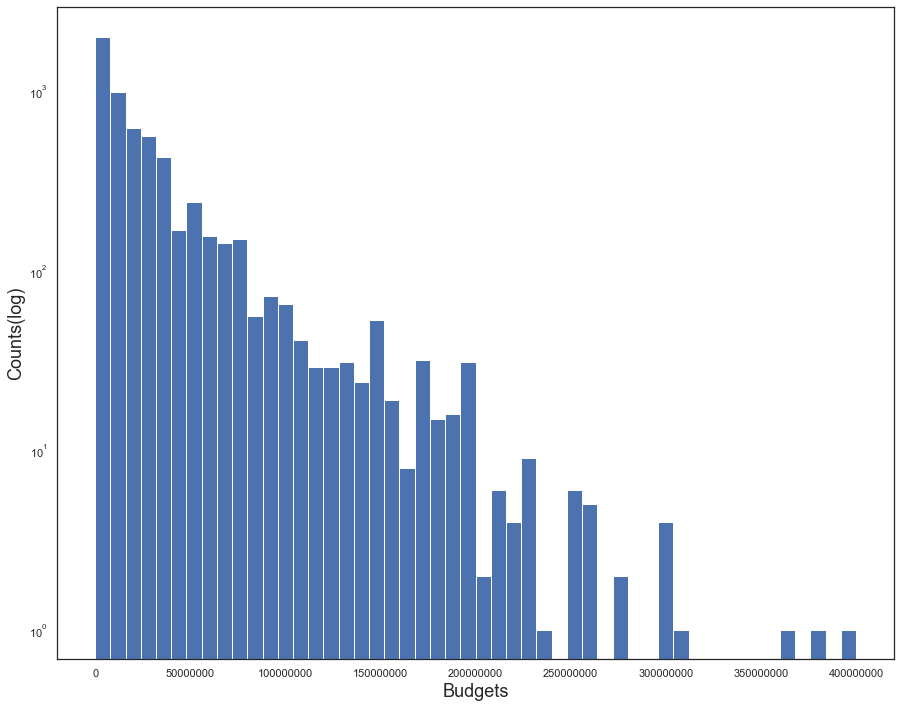

In [114]:
# Histogram of Budgets
# sns.distplot(budgets_pd['budget'], kde = False)
# sns.set(xticks=)
# budgets_pd['budget'].hist(bins = 100)
x_tix = range(0,450000000,50000000)
# print(x_tix)
fig, ax = plt.subplots(figsize =(15,12))
ax.hist(budgets_pd['budget'], 50)
ax.set_xticks(x_tix)
ax.set_yscale('log')
ax.set_xlabel('Budgets', fontsize=18)
ax.set_ylabel('Counts(log)', fontsize=18)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

In [ ]:
# Histogram of Budgets
# sns.distplot(budgets_pd['budget'], kde = False)
# sns.set(xticks=)
# budgets_pd['budget'].hist(bins = 100)
x_tix = range(0,450000000,50000000)
# print(x_tix)
fig, ax = plt.subplots(figsize =(15,12))
ax.hist(a_series, 50)
ax.set_xticks(x_tix)
ax.set_yscale('log')
ax.set_xlabel('Budgets', fontsize=18)
ax.set_ylabel('Counts(log)', fontsize=18)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

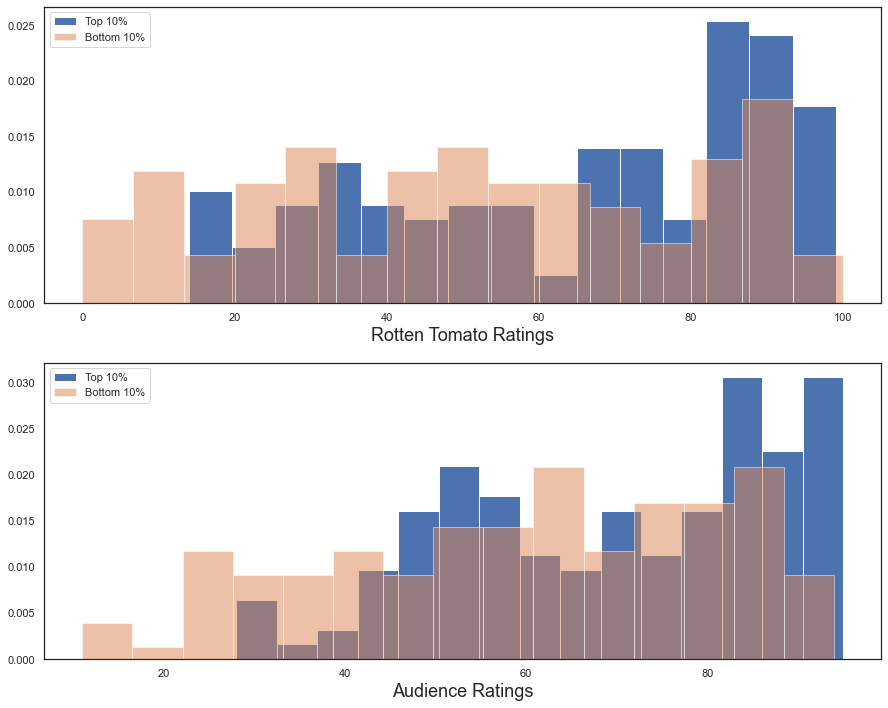

In [188]:
# Histogram of normalized top 10% budget ratings vs bottom 10%

# ADJUST BIN WIDTHS, USE DENSITY FOR Y INSTEAD OF COUNTS
fig, axs = plt.subplots(2, 1, figsize =(15,12))

labels = ["Top 10%", "Bottom 10%"]

axs[0].hist(rta_series, 15, label=labels[0], density = True)
axs[0].hist(rtb_series, 15, label=labels[1], density = True, alpha = 0.5)
axs[0].legend(loc="upper left")
axs[0].set_xlabel('Rotten Tomato Ratings', fontsize=18)

axs[1].hist(auda_series, 15, label=labels[0], density = True)
axs[1].hist(audb_series, 15, label=labels[1], density = True, alpha = 0.5)
axs[1].legend(loc="upper left")
axs[1].set_xlabel('Audience Ratings', fontsize=18)
# axs.set_ylabel('Counts', fontsize=18)
plt.show()

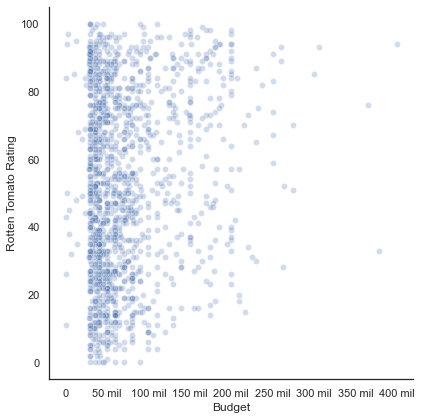

In [181]:
# Seaborn for scatter of Rotten Tomato Ratings vs Budget of Movie
sns.set(style="white")

# Load the example mpg dataset
# bvr = sns.load_dataset("m")
# Plot miles per gallon against horsepower with other semantics
splot = sns.relplot(x="budget", y="rotten_tomato_rating",
            sizes=(40, 400), alpha=.25, palette="muted",
            height=6, data=m, ax=ax1)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
x_tix = range(0,450000000,50000000)
x_tixlabels = ['0','50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil', '400 mil']
splot.set(xlabel="Budget", ylabel="Rotten Tomato Rating", xticks=x_tix, xticklabels=x_tixlabels)
# splot.set(xscale="log")

# xlabels = ['{:,.2f}'.format(x) + 'K' for x in splot.get_xticks()/1000]
# splot.set_xticklabels(xlabels)


# ADD hue="oscar" or director writers etc if able to add this data to color
# the points

# Seaborn example scatter
# sns.relplot(x="budget", y="rotten_tomato_rating", hue="origin", size="weight",
#             sizes=(40, 400), alpha=.5, palette="muted",
#             height=6, data=m)

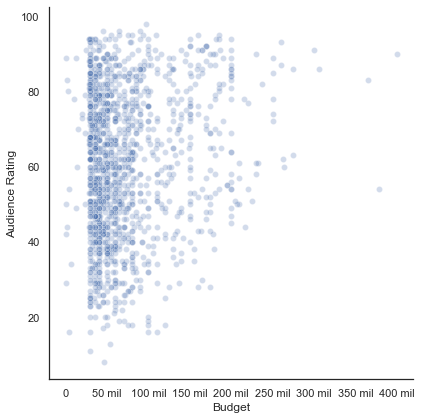

In [182]:
# Seaborn for scatter of Audience Rating vs Budget of Movie
sns.set(style="white")

splot = sns.relplot(x="budget", y="audience_rating",
            sizes=(40, 400), alpha=.25, palette="muted",
            height=6, data=m, ax=ax1)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
x_tix = range(0,450000000,50000000)
x_tixlabels = ['0','50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil', '400 mil']
splot.set(xlabel="Budget", ylabel="Audience Rating", xticks=x_tix, xticklabels= x_tixlabels)

In [193]:
# Shapiro test to see if sample is from something with normal dist.

# scipy.stats.shapiro(x, a=None, reta=False)[source]
# Test statistic, p-value
# x = array of your data
# scipy.stats.normaltest

rta_p = stats.shapiro(rta_series)
rtb_p = stats.shapiro(rtb_series)
auda_p = stats.shapiro(auda_series)
audb_p = stats.shapiro(audb_series)

print(rta_p, rtb_p, auda_p, audb_p)

ShapiroResult(statistic=0.9130712747573853, pvalue=1.907851157056939e-07) ShapiroResult(statistic=0.9533798098564148, pvalue=0.00012076774874003604) ShapiroResult(statistic=0.9351845383644104, pvalue=5.048029379395302e-06) ShapiroResult(statistic=0.9611542224884033, pvalue=0.0005587670602835715)


In [197]:
# T-Test

_, rt_p_val = stats.ttest_ind(rta_series, rtb_series, nan_policy='omit')
_, aud_p_val = stats.ttest_ind(auda_series, audb_series, nan_policy='omit')

In [198]:
print(rt_p_val)
print(aud_p_val)

7.117175502578697e-05
2.9084985302535624e-05
